In [2]:
import pandas as pd

# Load the dataset
dataset="/content/netflix_titles.csv"
data = pd.read_csv(dataset)

# Display basic statistics and information
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])
print("\nData types:")
print(data.dtypes)
print("\nBasic statistics:")
print(data.describe())
# Show the first few rows
print("\nFirst few rows:")
print(data.head())


Number of rows: 8807
Number of columns: 12

Data types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Basic statistics:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

First few rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        count

In [3]:
# Handle missing values
print("\nMissing values:")
print(data.isnull().sum())

# Convert categorical variables
# Assuming 'type' and 'rating' are categorical variables
data['type'] = data['type'].astype('category')
data['rating'] = data['rating'].astype('category')

# Encoding categorical variables
data['type_encoded'] = data['type'].cat.codes
data['rating_encoded'] = data['rating'].cat.codes



Missing values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


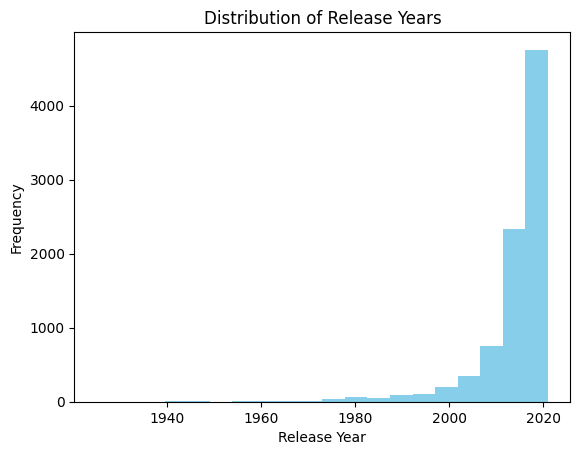

In [4]:
import matplotlib.pyplot as plt

# Visualize relationships between features
# For example, let's plot a histogram of release year
plt.hist(data['release_year'], bins=20, color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data[['type_encoded', 'rating_encoded', 'release_year']]  # Features
y = data['rating_encoded']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()


In [7]:
# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.9994324631101021
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         1
           3       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        87
           8       1.00      1.00      1.00       163
           9       1.00      1.00      1.00       414
          10       1.00      1.00      1.00        43
          11       1.00      1.00      1.00       662
          12       1.00      1.00      1.00       185
          13       1.00      1.00      1.00        52
          14       1.00      1.00      1.00        65

    accuracy                           1.00      1762
   macro avg       0.85      0.85      0.85      1762
weighted avg       1.00      1.00      1.00      1762



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.